# 2. Chrun Dataset Part 2 - Luke Fox

## 2.1 Load Libraries and download dataset

In [75]:
from matplotlib import cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

cmap = cm.get_cmap('rainbow') # Colour map (there are many others)

from IPython.display import display, Markdown
pd.set_option('display.max_columns', None)  
DEBUG = False

import os
for d in ['src','data','output']: os.makedirs(d, exist_ok=True)

In [76]:
for filename in ['churn.csv','states.csv']:
    source = f"https://kmurphy.bitbucket.io/modules/Data_Mining_2/topics/01-Module_Introduction/20-Practical_01_-_Review_of_Pandas_-_Churn/files/{filename}"
    target = f"src/{filename}"

    if not os.path.isfile(target):
        print (f"Downloading remote file {filename}", sep="")
        import urllib.request
        urllib.request.urlretrieve(source, target)
    else:
        print(f"Using local copy of {filename}")

Using local copy of churn.csv
Using local copy of states.csv


---
## 2.2 Load and Prepare the Data - churn

In [77]:
df = pd.read_csv("src/churn.csv")
display(df.shape)
df.head()

(3333, 21)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Standardise column names

In [78]:
names = df.columns.tolist()
print("Original columns names:\n", names)

Original columns names:
 ['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [79]:
CORRECTIONS = {" ":"_", "'":"", "?":"", "CustServ":"Cust_Serv"}

def fixName(s):
    for a,b in CORRECTIONS.items():
        s = s.replace(a,b)
    return s

mapping = {c:fixName(c) for c in names}
mapping

{'State': 'State',
 'Account Length': 'Account_Length',
 'Area Code': 'Area_Code',
 'Phone': 'Phone',
 "Int'l Plan": 'Intl_Plan',
 'VMail Plan': 'VMail_Plan',
 'VMail Message': 'VMail_Message',
 'Day Mins': 'Day_Mins',
 'Day Calls': 'Day_Calls',
 'Day Charge': 'Day_Charge',
 'Eve Mins': 'Eve_Mins',
 'Eve Calls': 'Eve_Calls',
 'Eve Charge': 'Eve_Charge',
 'Night Mins': 'Night_Mins',
 'Night Calls': 'Night_Calls',
 'Night Charge': 'Night_Charge',
 'Intl Mins': 'Intl_Mins',
 'Intl Calls': 'Intl_Calls',
 'Intl Charge': 'Intl_Charge',
 'CustServ Calls': 'Cust_Serv_Calls',
 'Churn?': 'Churn'}

In [80]:
df.rename(columns=mapping, inplace=True)

#### Drop user specific features (Phone)

In [81]:
df.drop(columns=["Phone"], inplace=True)

#### Drop highly correlated features

In [82]:
df.drop(columns=["Day_Charge", "Eve_Charge", "Night_Charge", "Intl_Charge"], inplace=True)

#### Standardise labels in target

In [83]:
df.Churn = df.Churn.map( {"False.":"no", "True.":"yes"} )

### Save

In [84]:
df.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,Cust_Serv_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,no
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no


In [85]:
df.to_csv("data/churn.csv", index=False)

## 2.3 Load and Prepare Dataset - states

In [86]:
df = pd.read_csv('src/states.csv')
display(df.shape)
df.head()

(52, 4)

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


### Data Cleaning

 * Columns names should be standardised (use title case)

#### Standardise columns

In [87]:
df.columns = [c.title() for c in  df.columns]
df.head()

,State,Latitude,Longitude,Name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


### Save

In [88]:
df.to_csv("data/states.csv", index=False)

### Merge

In [89]:
churn_dataset = pd.read_csv('data/churn.csv')
state_dataset = pd.read_csv('data/states.csv')
df = pd.merge(churn_dataset, state_dataset, on="State")

## 2.4 Graphing

### Churn Breakdown

[Text(0, 0.5, 'Customers'),
 Text(0.5, 0, 'Churned'),
 Text(0.5, 1.0, 'Breakdown by Churn')]

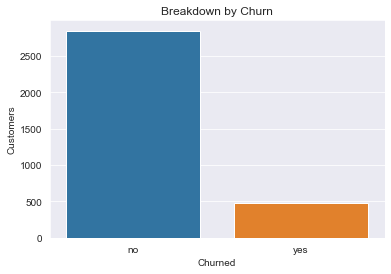

In [90]:
data = df["Churn"].value_counts()
plot = sns.barplot(data.index, data.values)
plot.set(xlabel='Churned', ylabel='Customers', title='Breakdown by Churn')

### Observation By State

[Text(0, 0.5, 'State'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Observation by State')]

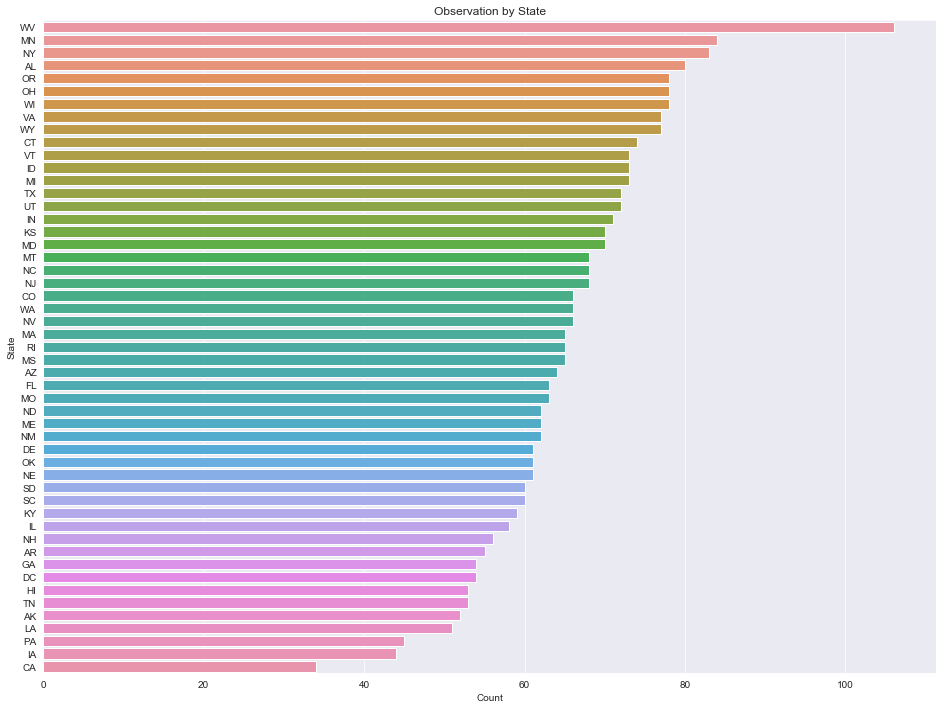

In [91]:
data = df["State"].value_counts()
plt.figure(figsize=(16, 12))
plot = sns.barplot(y = data.index, x = data, orient='h')
plot.set(xlabel='Count', ylabel='State', title='Observation by State')

### Rate of Churn By State

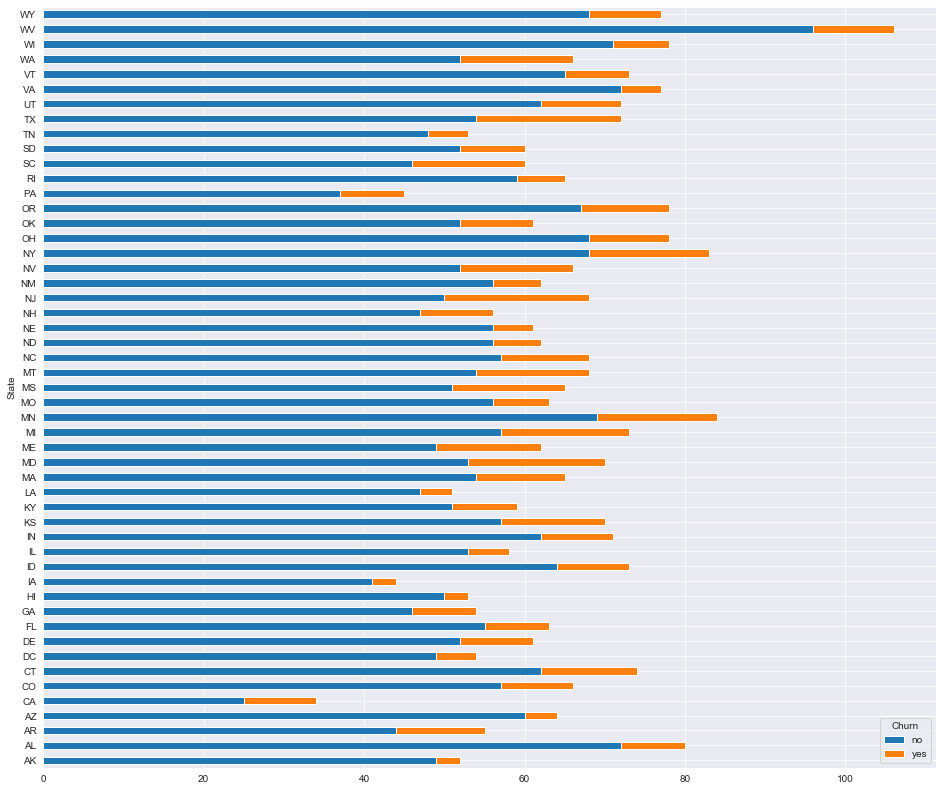

In [92]:
df.groupby(['State', 'Churn']).size().unstack().plot(kind='barh', stacked=True, figsize=(16, 14))

### Link Between Categorical Data and Churn

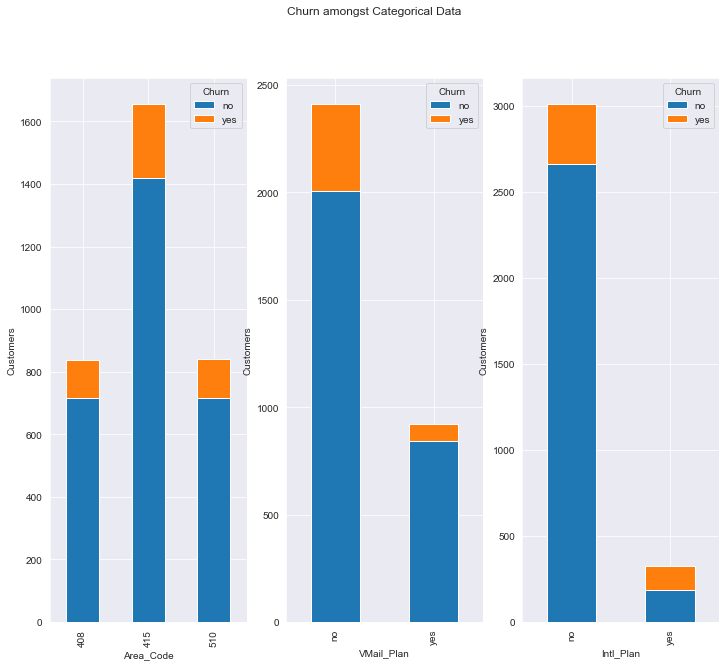

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 10))
categories = ['Area_Code', 'VMail_Plan', 'Intl_Plan']
plt.suptitle('Churn amongst Categorical Data')

for i in range(len(categories)):
    plot = df.groupby([categories[i], 'Churn']).size().unstack().plot(kind='bar', stacked=True, ax=axes[i]).set(ylabel='Customers')

### Link Between Customer Service Calls and Churn

[Text(0, 0.5, 'No. Of Customers'),
 Text(0.5, 0, 'No. Of Customer Service Calls'),
 Text(0.5, 1.0, 'Churn Rate vs 1 Or More Customer Service Calls')]

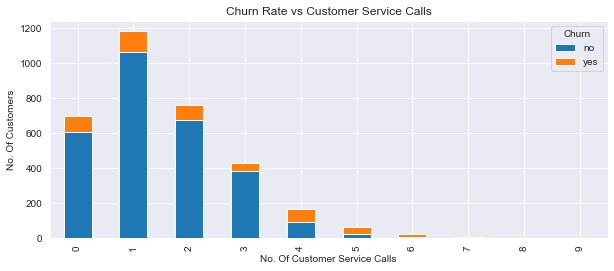

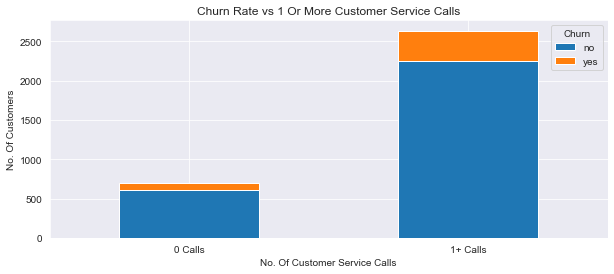

In [94]:
df.groupby(['Cust_Serv_Calls', 'Churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 4)).set(
    title='Churn Rate vs Customer Service Calls', xlabel='No. Of Customer Service Calls', ylabel='No. Of Customers')
calls_data = df.groupby([(df['Cust_Serv_Calls']>=1), 'Churn']).size().unstack()
calls_data.index = ['0 Calls', '1+ Calls']
calls_data.plot(kind='bar', stacked=True, figsize=(10, 4), rot=0).set(
    title='Churn Rate vs 1 Or More Customer Service Calls', xlabel='No. Of Customer Service Calls', ylabel='No. Of Customers')

## COMMENTS

# As seen in the second graph, the rate of churn is higher when customer have to call customer service once or more.

### Link Between Number of Calls and Churn

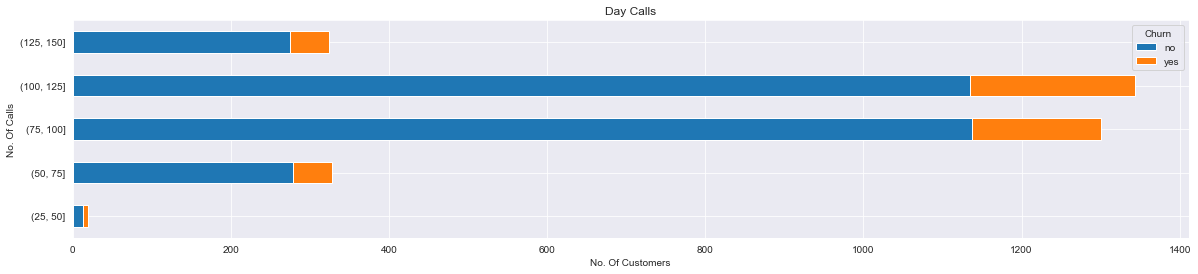

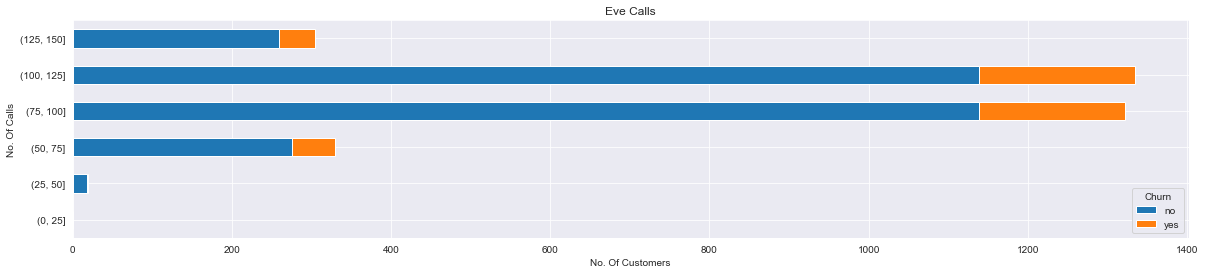

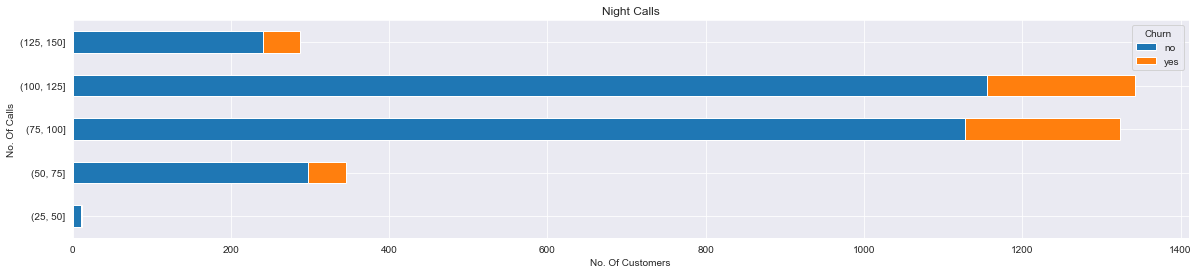

In [95]:
ranges = [0,25,50,75,100,125,150]
categories = ['Day_Calls', 'Eve_Calls','Night_Calls']

for i in range(len(categories)):
    df.groupby([pd.cut(df[categories[i]], ranges), 'Churn']).size().unstack().plot(kind='barh', stacked=True, figsize=(20, 4)).set(
        title='{0}'.format(categories[i].replace('_', ' ')), xlabel='No. Of Customers', ylabel='No. Of Calls')
    
## COMMENTS

# Churn rate is much higher amongst users who actively call. This could suggest active customers are leaving
# their current providers in search of providers offering better deals. Innactive users churn less as they 
# are less affected by unfavourable network plans simply because of their low usage.

### Most Active State By Total Mins (Sum)

[Text(0, 0.5, 'Total Mins'),
 Text(0.5, 0, 'State'),
 Text(0.5, 1.0, 'Sum of Total Mins per State')]

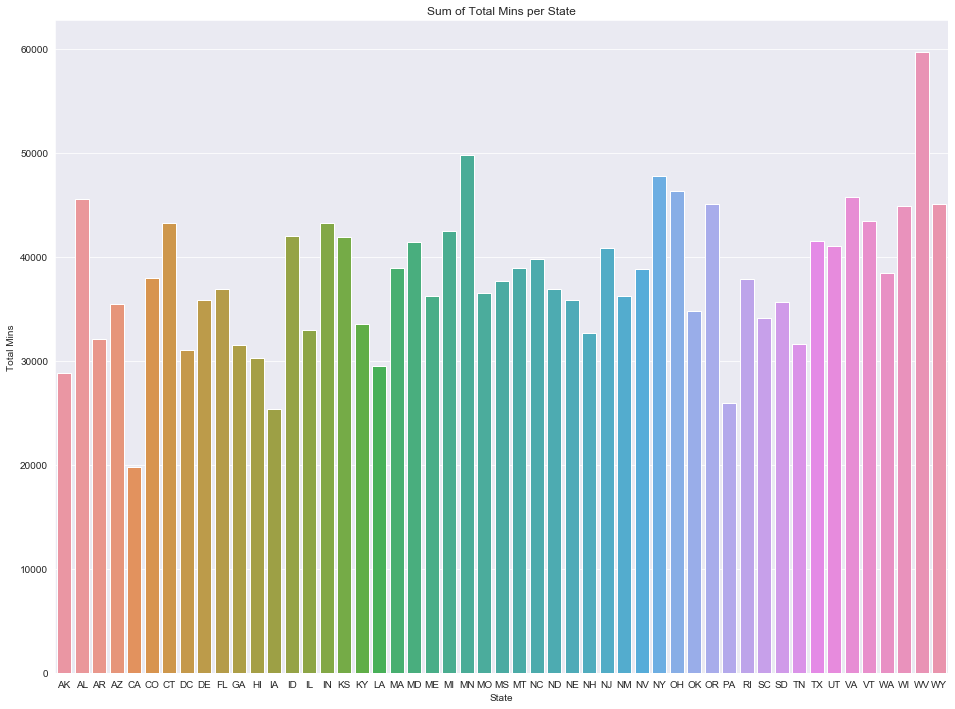

In [137]:
plt.figure(figsize=(16, 12))
df['Total_Mins'] = df['Day_Mins'] + df['Eve_Mins'] + df['Night_Mins']
data = df.groupby('State').Total_Mins.sum()
plot = sns.barplot(data.index, data.values)
plot.set(xlabel='State', ylabel='Total Mins', title='Sum of Total Mins per State')

## COMMENTS
# Network providers may want to see which states use the most minutes (sum of day, eve and night by state) for marketing 
# purposes or to offer incentives.

### Most Active State By Total Calls (Sum)

[Text(0, 0.5, 'Total Calls'),
 Text(0.5, 0, 'State'),
 Text(0.5, 1.0, 'Sum of Total Calls per State')]

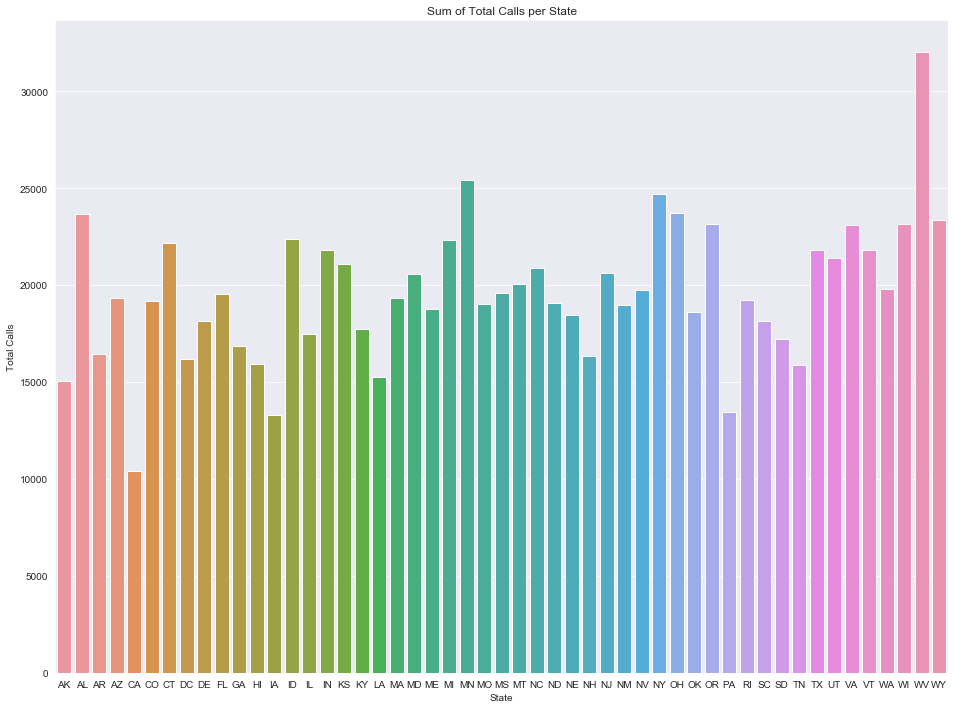

In [138]:
plt.figure(figsize=(16, 12))
df['Total_Calls'] = df['Day_Calls'] + df['Eve_Calls'] + df['Night_Calls']
data = df.groupby('State').Total_Calls.sum()
plot = sns.barplot(data.index, data.values)
plot.set(xlabel='State', ylabel='Total Calls', title='Sum of Total Calls per State')

## COMMENTS
# Network providers may want to see which states use the most calls (sum of day, eve and night by state) for marketing 
# purposes or to offer incentives.

### Most Active State By Total Mins (Mean)

[Text(0, 0.5, 'Average Mins'),
 Text(0.5, 0, 'State'),
 Text(0.5, 1.0, 'Average of Total Mins per State')]

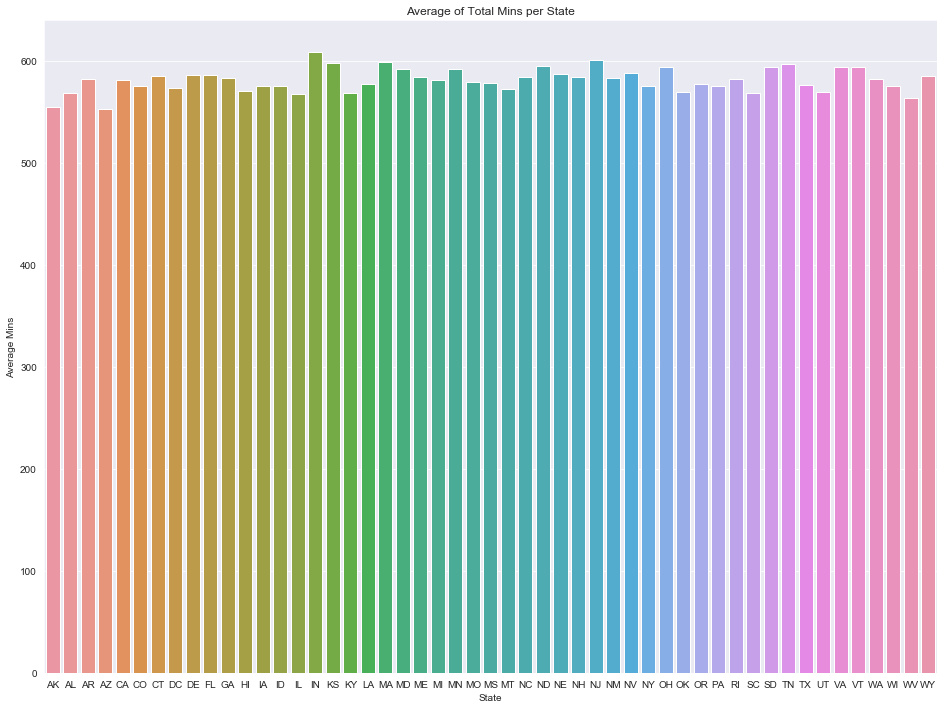

In [140]:
plt.figure(figsize=(16, 12))
df['Total_Mins'] = df['Day_Mins'] + df['Eve_Mins'] + df['Night_Mins']
data = df.groupby('State').Total_Mins.mean()
plot = sns.barplot(data.index, data.values)
plot.set(xlabel='State', ylabel='Average Mins', title='Average of Total Mins per State')

## COMMENTS
# Network providers may want to see which states use the most minutes on average (day, eve and night by state) for marketing
# purposes or to offer incentives.

### Most Active State By Total Calls (Average)

[Text(0, 0.5, 'Total Calls'),
 Text(0.5, 0, 'State'),
 Text(0.5, 1.0, 'Average of Total Calls per State')]

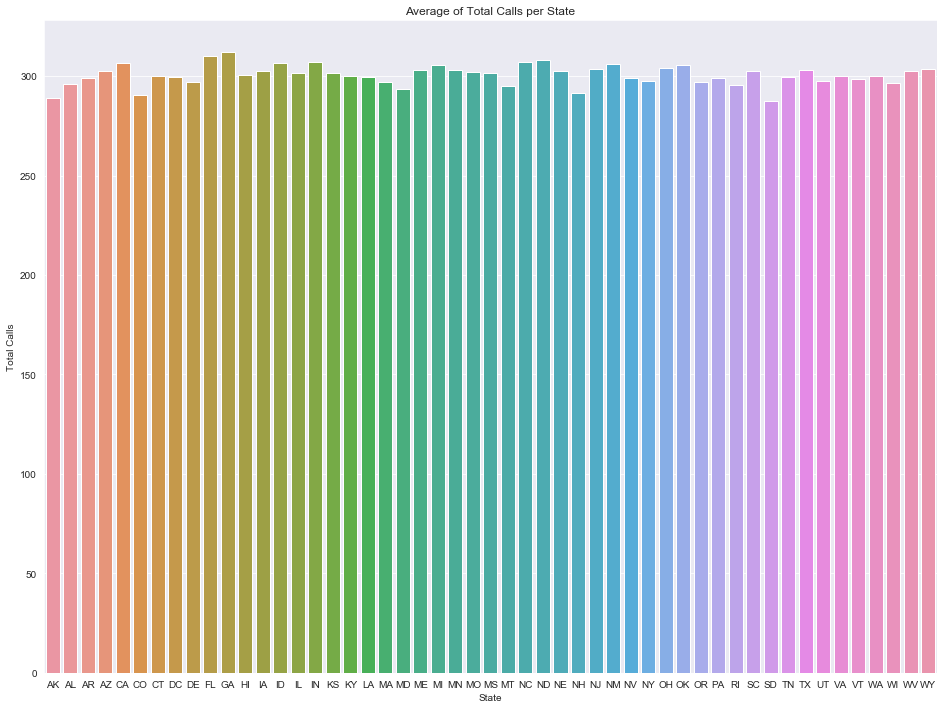

In [142]:
plt.figure(figsize=(16, 12))
df['Total_Calls'] = df['Day_Calls'] + df['Eve_Calls'] + df['Night_Calls']
data = df.groupby('State').Total_Calls.mean()
plot = sns.barplot(data.index, data.values)
plot.set(xlabel='State', ylabel='Average Calls', title='Average of Total Calls per State')

## COMMENTS
# Network providers may want to see which states use the most calls on average (day, eve and night by state) for marketing
# purposes or to offer incentives.